In [1]:
import torchvision

In [2]:
mnist_dataset = torchvision.datasets.MNIST("./mnist", 'train', download=True)

In [3]:
examples = next(iter(mnist_dataset))

In [4]:
print(examples)

(<PIL.Image.Image image mode=L size=28x28 at 0x7FC628BAF0D0>, 5)


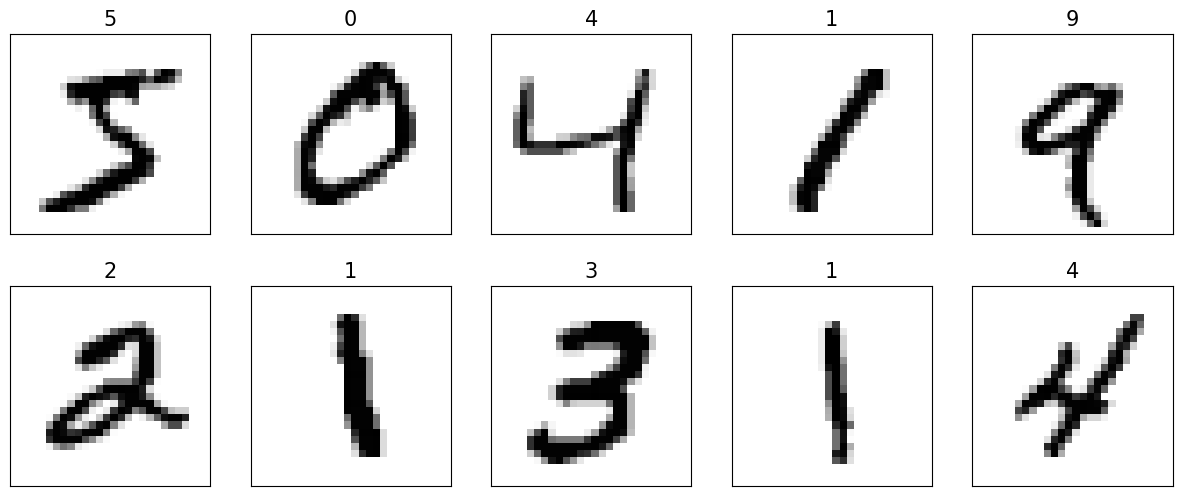

In [5]:
import matplotlib.pyplot as plt
from itertools import islice
fig = plt.figure(figsize=(15, 6))
for i, (image, label) in islice(enumerate(mnist_dataset), 10):
    ax = fig.add_subplot(2, 5, i+1)
    ax.set_xticks([]); ax.set_yticks([])
    ax.imshow(image, cmap='gray_r')
    ax.set_title(f'{label}', size=15)

#plt.savefig('figures/12_06.pdf')
plt.show()

In [6]:
from torchvision import transforms
train_dataset = torchvision.datasets.MNIST("./data/MNIST", train=True, download=True, transform=transforms.ToTensor())

In [7]:
test_dataset = torchvision.datasets.MNIST("./data/MNIST", train=False, download=True, transform=transforms.ToTensor())

In [8]:
import torch

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size= 32, shuffle=True)

In [9]:
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size= 32, shuffle=True)

In [10]:
for  X_train, y_train   in train_loader:
  print('x_train : ', X_train.size())
  print('y_train : ', y_train.shape)
  print(y_train)
  break

x_train :  torch.Size([32, 1, 28, 28])
y_train :  torch.Size([32])
tensor([3, 8, 4, 3, 3, 1, 3, 1, 9, 4, 4, 0, 7, 0, 5, 3, 4, 9, 0, 0, 5, 4, 7, 2,
        1, 2, 4, 2, 6, 9, 2, 3])


In [11]:
28 * 28 * 512

401408

In [12]:
import torch.nn as nn

In [13]:
# DNN(Deep Neural Network)
# 완전 연결층
import torch.nn.functional as F
class Net(nn.Module):
  def __init__(self):
    super(Net, self).__init__()
    self.fc1 = nn.Linear(28 * 28, 512)
    self.fc2 = nn.Linear(512, 256)
    self.fc3 = nn.Linear(256, 10)

  def forward(self, x ):
    x = x.view(-1, 28 * 28)
    x = self.fc1(x)
    x = F.sigmoid(x) # 활성화 함수
    x = self.fc2(x)
    x = F.sigmoid(x)
    x = self.fc3(x)
    x = F.log_softmax(x)
    return x

In [14]:
model = Net()

In [15]:
pip install torchinfo

In [16]:
from torchinfo import summary

In [17]:
256 * 10  + 10

2570

In [18]:
summary(model)

Layer (type:depth-idx)                   Param #
Net                                      --
├─Linear: 1-1                            401,920
├─Linear: 1-2                            131,328
├─Linear: 1-3                            2,570
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0

In [19]:
criterion = nn.CrossEntropyLoss()
epoch = 10
def train(model, train_loader, optimizer, log_interval):
    model.train()
    for batch_idx, (image, label) in enumerate(train_loader):
        optimizer.zero_grad()
        output = model(image)
        loss = criterion(output, label)
        loss.backward()
        optimizer.step()

        if batch_idx % log_interval == 0:
            print("Train Epoch: {} [{}/{} ({:.0f}%)]\tTrain Loss: {:.6f}".format(
                epoch, batch_idx * len(image),
                len(train_loader.dataset), 100. * batch_idx / len(train_loader),
                loss.item()))

In [20]:
BATCH_SIZE = 32
def evaluate(model, test_loader):
    model.eval()
    test_loss = 0
    correct = 0

    with torch.no_grad():
        for image, label in test_loader:
            output = model(image)
            test_loss += criterion(output, label).item()
            prediction = output.max(1, keepdim = True)[1]
            correct += prediction.eq(label.view_as(prediction)).sum().item()

    test_loss /= (len(test_loader.dataset) / BATCH_SIZE)
    test_accuracy = 100. * correct / len(test_loader.dataset)
    return test_loss, test_accuracy

In [21]:
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01, momentum = 0.5)

In [22]:
EPOCHS = 10
for epoch in range(1, EPOCHS + 1):
    train(model, train_loader, optimizer, log_interval = 200)
    test_loss, test_accuracy = evaluate(model, test_loader)
    print("\n[EPOCH: {}], \tTest Loss: {:.4f}, \tTest Accuracy: {:.2f} % \n".format(
        epoch, test_loss, test_accuracy))

/tmp/ipython-input-13-1413823927.py:18: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.log_softmax(x)


Train Epoch: 1 [0/60000 (0%)]	Train Loss: 2.310694
Train Epoch: 1 [6400/60000 (11%)]	Train Loss: 2.355605
Train Epoch: 1 [12800/60000 (21%)]	Train Loss: 2.312575
Train Epoch: 1 [19200/60000 (32%)]	Train Loss: 2.311646
Train Epoch: 1 [25600/60000 (43%)]	Train Loss: 2.298285
Train Epoch: 1 [32000/60000 (53%)]	Train Loss: 2.261649
Train Epoch: 1 [38400/60000 (64%)]	Train Loss: 2.276131
Train Epoch: 1 [44800/60000 (75%)]	Train Loss: 2.245548
Train Epoch: 1 [51200/60000 (85%)]	Train Loss: 2.282028
Train Epoch: 1 [57600/60000 (96%)]	Train Loss: 2.252125

[EPOCH: 1], 	Test Loss: 2.2299, 	Test Accuracy: 21.64 % 

Train Epoch: 2 [0/60000 (0%)]	Train Loss: 2.237760
Train Epoch: 2 [6400/60000 (11%)]	Train Loss: 2.278750
Train Epoch: 2 [12800/60000 (21%)]	Train Loss: 2.104239
Train Epoch: 2 [19200/60000 (32%)]	Train Loss: 2.176349
Train Epoch: 2 [25600/60000 (43%)]	Train Loss: 1.936395
Train Epoch: 2 [32000/60000 (53%)]	Train Loss: 1.811860
Train Epoch: 2 [38400/60000 (64%)]	Train Loss: 1.464969
T